## Домашнее задание от 24.02.2020 г. «Ошибки и провалы при интерпретации аналитических показателей»
ФИО: Кривова Татьяна Сергеевна

**Задание**. Получить датасет (набор данных) с которым предполагается работать в дальнейшем. Дать минимально необходимое описание датасета. В случае если данные уже сейчас используются для анализа и принятия решения, напишите на какие вопросы они отвечают (или есть потребность ответить).

Целевая метрика - стоимость акций российских компаний: Московская биржа (MOEX),	Сбербанк-п (SBER_p), Сургутнефтегаз-п (SNGS_p), Аэрофлот (AFLT). Посмотрим ежемесячные значения в рублях за последние 15 лет (с 31 января 2005 по 31 января 2020 г.)

Визуализируем вместе с курсом доллара.

Основной вопрос - получение прибыли от долгосрочных инвестиций (в акции российских компаний, валюту и другие инструменты).

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
quotes = pd.read_excel('quotes(cbr.ru_investing.com_statbureau.org).xlsx')

**inflation_monthly_rus** - значение инфляции (источник statbureau.org)

**usd_value, euro_value** - курсы валют (источник cbr.ru)

**oil_Brent, gold_futures, MOEX, SBER_p, SNGS_p, AFLT** - биржевые показатели (источник investing.com)

In [3]:
quotes.info()
quotes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 12 columns):
date                     181 non-null datetime64[ns]
year                     181 non-null int64
month                    181 non-null int64
inflation_monthly_rus    181 non-null float64
usd_value                181 non-null float64
euro_value               181 non-null float64
oil_Brent                181 non-null float64
gold_futures             181 non-null float64
MOEX                     83 non-null float64
SBER_p                   181 non-null float64
SNGS_p                   181 non-null float64
AFLT                     181 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 17.0 KB


,date,year,month,inflation_monthly_rus,usd_value,euro_value,oil_Brent,gold_futures,MOEX,SBER_p,SNGS_p,AFLT
0,2005-01-31,2005,1,12.70,28.0845,36.6250,45.92,421.8,NaN,7.43,15.901,36.23
1,2005-02-28,2005,2,12.96,27.7738,36.6281,50.06,436.5,NaN,8.50,18.153,40.69
2,2005-03-31,2005,3,13.63,27.8256,36.0564,54.29,428.7,NaN,8.49,16.500,43.10
3,2005-04-30,2005,4,13.77,27.7726,36.0072,51.09,435.0,NaN,8.90,15.789,41.35
4,2005-05-31,2005,5,13.84,28.0919,35.1963,50.73,416.3,NaN,9.18,14.697,41.99
5,2005-06-30,2005,6,13.68,28.6721,34.5241,55.58,435.9,NaN,11.75,16.497,42.29
6,2005-07-31,2005,7,13.16,28.6341,34.7160,59.37,429.9,NaN,14.44,18.626,42.29
7,2005-08-31,2005,8,12.53,28.5450,34.8763,67.02,433.8,NaN,19.18,21.202,41.40
8,2005-09-30,2005,9,12.33,28.4989,34.3811,63.48,469.0,NaN,19.57,24.700,40.80
9,2005-10-31,2005,10,11.68,28.4244,34.5300,58.10,465.1,NaN,18.17,21.401,36.50


([<matplotlib.axis.YTick at 0xb28c630>,
 <a list of 10 Text yticklabel objects>)

Text(0.5, 1.0, 'Ежемесячные значения курсов акций с 2005 г. (investing.com)')

Text(0, 0.5, 'Рублей')

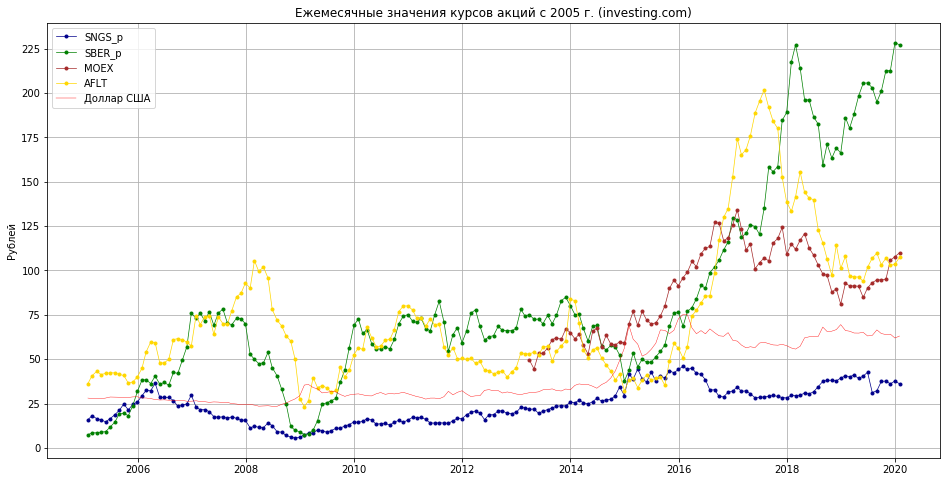

In [5]:
# Посмотрим ежемесячную динамику курсов акций MOEX, SBER_p, SNGS_p, AFLT и доллара США

rcParams['figure.figsize'] = 16,8

x = quotes.date
plt.plot(x, quotes.SNGS_p, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p')
plt.plot(x, quotes.SBER_p, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p')
plt.plot(x, quotes.MOEX, color="brown", marker="o", markersize=3, linewidth=0.7, label='MOEX')
plt.plot(x, quotes.AFLT, color="gold", marker="o", markersize=3, linewidth=0.7, label='AFLT')

plt.plot(x, quotes.usd_value, color="red", linewidth=0.4, label='Доллар США')

plt.grid(True)
plt.yticks(range(0, 250, 25))
plt.title('Ежемесячные значения курсов акций с 2005 г. (investing.com)')
plt.legend()
plt.ylabel('Рублей')

Text(0.5, 1.0, 'Ежемесячные значения курсов акций в долларах США с 2005 г. (investing.com, cbr.ru)')

Text(0, 0.5, 'Долларов США')

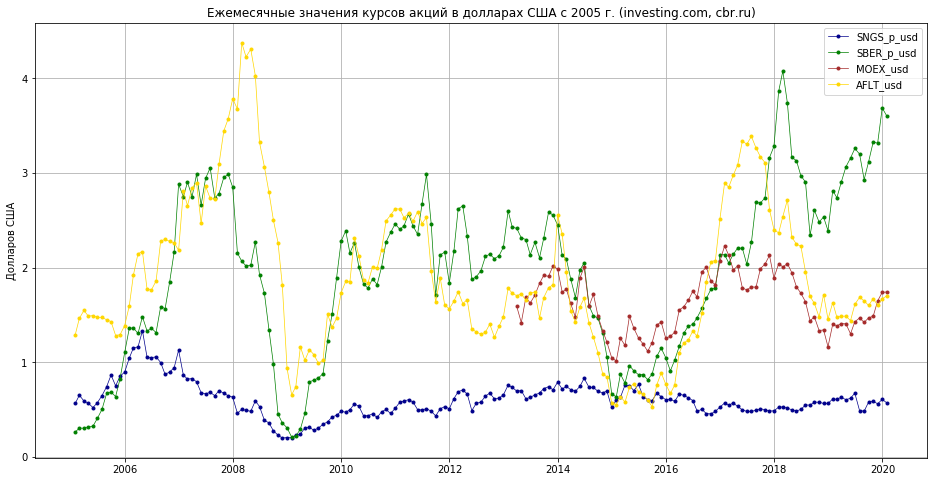

In [6]:
# Добавим признаки: курсы акций MOEX, SBER_p, SNGS_p, AFLT в долларах США и посмотрим график

quotes['MOEX_usd'] = quotes.MOEX/quotes.usd_value
quotes['SBER_p_usd'] = quotes.SBER_p/quotes.usd_value
quotes['SNGS_p_usd'] = quotes.SNGS_p/quotes.usd_value
quotes['AFLT_usd'] = quotes.AFLT/quotes.usd_value

# в столбцах MOEX и MOEX_usd есть отсутствующие значения

x = quotes.date
plt.plot(x, quotes.SNGS_p_usd, color="darkblue", marker="o", markersize=3, linewidth=0.7, label='SNGS_p_usd')
plt.plot(x, quotes.SBER_p_usd, color="green", marker="o", markersize=3, linewidth=0.7, label='SBER_p_usd')
plt.plot(x, quotes.MOEX_usd, color="brown", marker="o", markersize=3, linewidth=0.7, label='MOEX_usd')
plt.plot(x, quotes.AFLT_usd, color="gold", marker="o", markersize=3, linewidth=0.7, label='AFLT_usd')

plt.grid(True)
plt.title('Ежемесячные значения курсов акций в долларах США с 2005 г. (investing.com, cbr.ru)')
plt.legend()
plt.ylabel('Долларов США')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A03C7B0>,
      dtype=object)

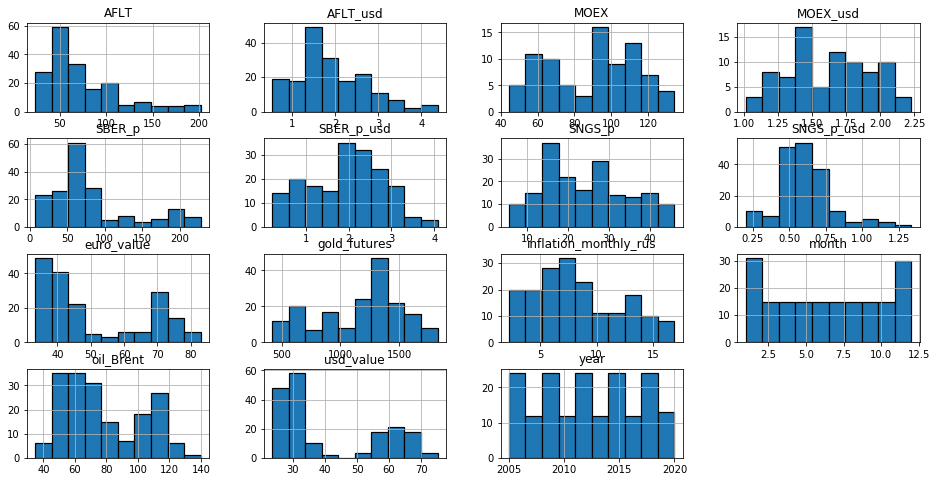

In [7]:
quotes.hist(edgecolor='black', linewidth=1.2) # Распределения